In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from tree.base import DecisionTree
from metrics import accuracy, precision, recall
import matplotlib.pyplot as plt

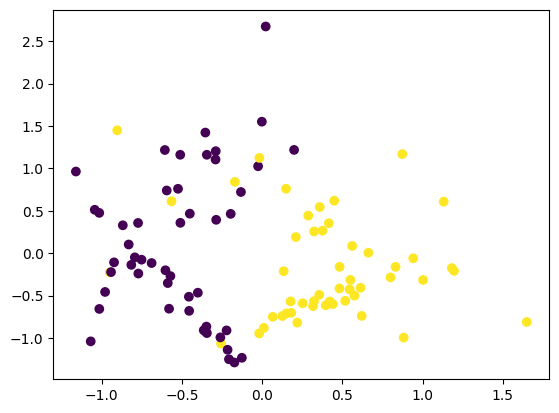

In [4]:
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [6]:
X_tr = pd.DataFrame(X_train)
y_tr = pd.Series(y_train)
X_ts = pd.DataFrame(X_test)
y_ts = pd.Series(y_test)

In [7]:
from tree.base import DecisionTree
dtc = DecisionTree(criterion="information_gain")

dtc.fit(X_tr,y_tr)

In [8]:
y_pred = dtc.predict(X_ts)
y_pred

0     1
1     0
2     0
3     1
4     1
5     1
6     0
7     1
8     0
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    0
28    0
29    1
dtype: int64

In [9]:
from metrics import precision
prec = precision(y_ts,y_pred,1)
prec

0.8

In [10]:
from metrics import recall
rec = recall(y_ts,y_pred,1)
rec

0.9230769230769231

Outer Fold 1: Best Depth = 3, Validation Accuracy = 0.6429
Outer Fold 2: Best Depth = 5, Validation Accuracy = 0.8571
Outer Fold 3: Best Depth = 3, Validation Accuracy = 0.9286
Outer Fold 4: Best Depth = 3, Validation Accuracy = 1.0000
Outer Fold 5: Best Depth = 3, Validation Accuracy = 1.0000

Average Best Depth: 3.40
Average Validation Accuracy: 0.8857

Final Model (Depth = 3):
Test Accuracy: 0.9000
Test Precision: 0.8000
Test Recall: 1.0000


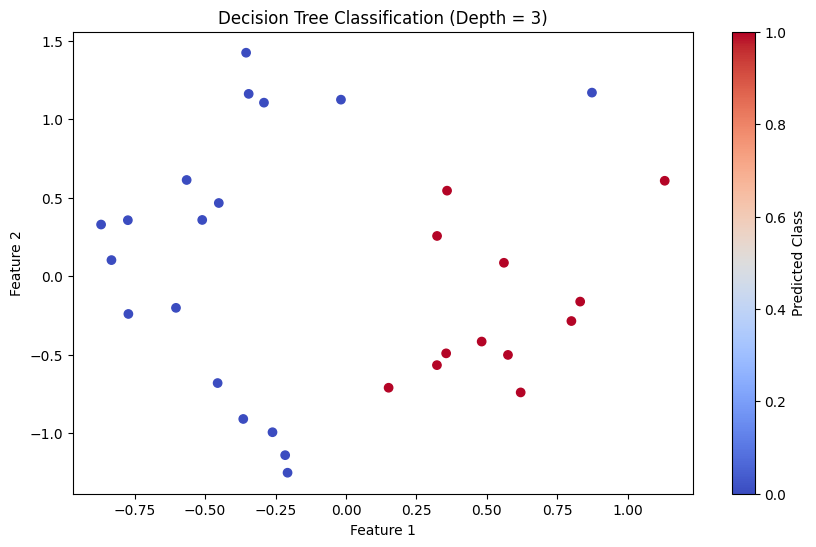

In [12]:


# Define the range of depths to try
max_depths = range(1, 11)  # Try depths from 1 to 10

# Initialize variables for nested cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

best_depths = []
best_scores = []

# Outer cross-validation loop
for outer_fold, (train_index, val_index) in enumerate(outer_cv.split(X_train)):
    X_train_outer, X_val_outer = X_train[train_index], X_train[val_index]
    y_train_outer, y_val_outer = y_train[train_index], y_train[val_index]
    
    # Inner cross-validation loop to find the best depth
    depth_scores = []
    for depth in max_depths:
        inner_scores = []
        for inner_train_index, inner_val_index in inner_cv.split(X_train_outer):
            X_train_inner, X_val_inner = X_train_outer[inner_train_index], X_train_outer[inner_val_index]
            y_train_inner, y_val_inner = y_train_outer[inner_train_index], y_train_outer[inner_val_index]
            
            # Train the model
            dtc = DecisionTree(criterion="information_gain", max_depth=depth)
            dtc.fit(pd.DataFrame(X_train_inner), pd.Series(y_train_inner))
            
            # Make predictions and calculate accuracy
            y_pred_inner = dtc.predict(pd.DataFrame(X_val_inner))
            inner_scores.append(accuracy(pd.Series(y_val_inner), y_pred_inner))
        
        depth_scores.append(np.mean(inner_scores))
    
    # Find the best depth for this outer fold
    best_depth = max_depths[np.argmax(depth_scores)]
    best_depths.append(best_depth)
    
    # Train the model with the best depth on the outer training set
    best_dtc = DecisionTree(criterion="information_gain", max_depth=best_depth)
    best_dtc.fit(pd.DataFrame(X_train_outer), pd.Series(y_train_outer))
    
    # Evaluate on the outer validation set
    y_pred_outer = best_dtc.predict(pd.DataFrame(X_val_outer))
    best_scores.append(accuracy(pd.Series(y_val_outer), y_pred_outer))
    
    print(f"Outer Fold {outer_fold + 1}: Best Depth = {best_depth}, Validation Accuracy = {best_scores[-1]:.4f}")

# Print overall results
print(f"\nAverage Best Depth: {np.mean(best_depths):.2f}")
print(f"Average Validation Accuracy: {np.mean(best_scores):.4f}")

# Train the final model using the most common best depth
final_best_depth = max(set(best_depths), key=best_depths.count)
final_dtc = DecisionTree(criterion="information_gain", max_depth=final_best_depth)
final_dtc.fit(X_tr, y_tr)

# Make predictions on the test set
y_pred_test = final_dtc.predict(X_ts)

# Calculate and print final metrics
final_accuracy = accuracy(y_ts, y_pred_test)
final_precision = precision(y_ts, y_pred_test, 1)
final_recall = recall(y_ts, y_pred_test, 1)

print(f"\nFinal Model (Depth = {final_best_depth}):")
print(f"Test Accuracy: {final_accuracy:.4f}")
print(f"Test Precision: {final_precision:.4f}")
print(f"Test Recall: {final_recall:.4f}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='coolwarm')
plt.title(f"Decision Tree Classification (Depth = {final_best_depth})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Predicted Class")
plt.show()

In [13]:
# import pandas as pd
# import numpy as np
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split, KFold
# from tree.base import DecisionTree
# from metrics import accuracy, precision, recall
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# X, y = make_classification(
# n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# # For plotting
# import matplotlib.pyplot as plt
# plt.scatter(X[:, 0], X[:, 1], c=y)

# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)
# X_tr = pd.DataFrame(X_train)
# y_tr = pd.Series(y_train)
# X_ts = pd.DataFrame(X_test)
# y_ts = pd.Series(y_test)
# from tree.base import DecisionTree
# dtc = DecisionTree(criterion="information_gain")

# dtc.fit(X_tr,y_tr)
# y_pred = dtc.predict(X_ts)

# from metrics import precision
# prec = precision(y_ts,y_pred,1)
# prec
# from metrics import recall
# rec = recall(y_ts,y_pred,1)
# rec


# # Define the range of depths to try
# max_depths = range(1, 11)  # Try depths from 1 to 10

# # Initialize variables for nested cross-validation
# outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# best_depths = []
# best_scores = []

# # Outer cross-validation loop
# for outer_fold, (train_index, val_index) in enumerate(outer_cv.split(X_train)):
#     X_train_outer, X_val_outer = X_train[train_index], X_train[val_index]
#     y_train_outer, y_val_outer = y_train[train_index], y_train[val_index]
    
#     # Inner cross-validation loop to find the best depth
#     depth_scores = []
#     for depth in max_depths:
#         inner_scores = []
#         for inner_train_index, inner_val_index in inner_cv.split(X_train_outer):
#             X_train_inner, X_val_inner = X_train_outer[inner_train_index], X_train_outer[inner_val_index]
#             y_train_inner, y_val_inner = y_train_outer[inner_train_index], y_train_outer[inner_val_index]
            
#             # Train the model
#             dtc = DecisionTree(criterion="information_gain", max_depth=depth)
#             dtc.fit(pd.DataFrame(X_train_inner), pd.Series(y_train_inner))
            
#             # Make predictions and calculate accuracy
#             y_pred_inner = dtc.predict(pd.DataFrame(X_val_inner))
#             inner_scores.append(accuracy(pd.Series(y_val_inner), y_pred_inner))
        
#         depth_scores.append(np.mean(inner_scores))
    
#     # Find the best depth for this outer fold
#     best_depth = max_depths[np.argmax(depth_scores)]
#     best_depths.append(best_depth)
    
#     # Train the model with the best depth on the outer training set
#     best_dtc = DecisionTree(criterion="information_gain", max_depth=best_depth)
#     best_dtc.fit(pd.DataFrame(X_train_outer), pd.Series(y_train_outer))
    
#     # Evaluate on the outer validation set
#     y_pred_outer = best_dtc.predict(pd.DataFrame(X_val_outer))
#     best_scores.append(accuracy(pd.Series(y_val_outer), y_pred_outer))
    
#     print(f"Outer Fold {outer_fold + 1}: Best Depth = {best_depth}, Validation Accuracy = {best_scores[-1]:.4f}")

# # Print overall results
# print(f"\nAverage Best Depth: {np.mean(best_depths):.2f}")
# print(f"Average Validation Accuracy: {np.mean(best_scores):.4f}")

# # Train the final model using the most common best depth
# final_best_depth = max(set(best_depths), key=best_depths.count)
# final_dtc = DecisionTree(criterion="information_gain", max_depth=final_best_depth)
# final_dtc.fit(X_train_df, y_train_series)

# # Make predictions on the test set
# y_pred_test = final_dtc.predict(X_test_df)

# # Calculate and print final metrics
# final_accuracy = accuracy(y_test_series, y_pred_test)
# final_precision = precision(y_test_series, y_pred_test, 1)
# final_recall = recall(y_test_series, y_pred_test, 1)

# print(f"\nFinal Model (Depth = {final_best_depth}):")
# print(f"Test Accuracy: {final_accuracy:.4f}")
# print(f"Test Precision: {final_precision:.4f}")
# print(f"Test Recall: {final_recall:.4f}")

# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, cmap='coolwarm')
# plt.title(f"Decision Tree Classification (Depth = {final_best_depth})")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.colorbar(label="Predicted Class")
# plt.show()

